Kmeans and knn

In [217]:
# importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [176]:
dps = pd.read_csv('..\data\s4_dps.csv')
heals = pd.read_csv('..\data\s4_heals.csv')
tanks = pd.read_csv('..\data\s4_tank.csv')

Preprocessing

In [177]:
dps.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,"Scoped Accuracy, %",Role
0,Genji,All,2.50,3.45,49.28,18.30,5.06,64,7292,NaN,8.09,NaN,Damage
1,Genji,Bronze,2.37,1.15,44.89,16.33,5.34,70,6572,NaN,8.15,NaN,Damage
2,Genji,Silver,2.53,1.40,47.39,16.91,5.26,69,6777,NaN,8.16,NaN,Damage
3,Genji,Gold,2.50,2.21,48.29,17.63,5.31,68,7044,NaN,8.17,NaN,Damage
4,Genji,Platinum,2.51,3.53,49.10,18.32,5.21,66,7291,NaN,8.14,NaN,Damage


In [178]:
#finding different class labels 
np.unique(dps['Skill Tier'])

array(['All', 'Bronze', 'Diamond', 'Gold', 'Grandmaster', 'Master',
       'Platinum', 'Silver'], dtype=object)

In [179]:
np.unique(dps['Hero'])

array(['Ashe', 'Bastion', 'Cassidy', 'Echo', 'Genji', 'Hanzo', 'Junkrat',
       'Mei', 'Pharah', 'Reaper', 'Sojourn', 'Soldier: 76', 'Sombra',
       'Symmetra', 'Torbjorn', 'Tracer', 'Widowmaker'], dtype=object)

In [180]:
dps.shape

(136, 13)

In [181]:
dps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hero                     136 non-null    object 
 1   Skill Tier               136 non-null    object 
 2   KDA Ratio                136 non-null    float64
 3   Pick Rate, %             136 non-null    float64
 4   Win Rate, %              136 non-null    float64
 5   Eliminations / 10min     136 non-null    float64
 6   Objective Kills / 10min  136 non-null    float64
 7   Objective Time / 10min   136 non-null    int64  
 8   Damage / 10min           136 non-null    int64  
 9   Healing / 10min          8 non-null      float64
 10  Deaths / 10min           136 non-null    float64
 11  Scoped Accuracy, %       16 non-null     float64
 12  Role                     136 non-null    object 
dtypes: float64(8), int64(2), object(3)
memory usage: 13.9+ KB


In [182]:
dps_test = dps.copy()

In [183]:
np.unique(dps_test['Skill Tier'])

array(['All', 'Bronze', 'Diamond', 'Gold', 'Grandmaster', 'Master',
       'Platinum', 'Silver'], dtype=object)

In [184]:
dps_test.isnull().sum()

Hero                         0
Skill Tier                   0
KDA Ratio                    0
Pick Rate, %                 0
Win Rate, %                  0
Eliminations / 10min         0
Objective Kills / 10min      0
Objective Time / 10min       0
Damage / 10min               0
Healing / 10min            128
Deaths / 10min               0
Scoped Accuracy, %         120
Role                         0
dtype: int64

In [185]:
# LabelEncoder for 'Hero' column
dps_test = pd.get_dummies(dps_test, columns=['Hero', 'Skill Tier'])

In [186]:
columns_to_drop = ['Scoped Accuracy, %', 'Healing / 10min', 'Role', 'Pick Rate, %']

# Drop the specified columns
dps_test = dps_test.drop(columns=columns_to_drop)

In [187]:
dps_test.head()

,KDA Ratio,"Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Deaths / 10min,Hero_Ashe,Hero_Bastion,Hero_Cassidy,...,Hero_Tracer,Hero_Widowmaker,Skill Tier_All,Skill Tier_Bronze,Skill Tier_Diamond,Skill Tier_Gold,Skill Tier_Grandmaster,Skill Tier_Master,Skill Tier_Platinum,Skill Tier_Silver
0,2.50,49.28,18.30,5.06,64,7292,8.09,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2.37,44.89,16.33,5.34,70,6572,8.15,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2.53,47.39,16.91,5.26,69,6777,8.16,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2.50,48.29,17.63,5.31,68,7044,8.17,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2.51,49.10,18.32,5.21,66,7291,8.14,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [188]:
dps_test.head()

,KDA Ratio,"Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Deaths / 10min,Hero_Ashe,Hero_Bastion,Hero_Cassidy,...,Hero_Tracer,Hero_Widowmaker,Skill Tier_All,Skill Tier_Bronze,Skill Tier_Diamond,Skill Tier_Gold,Skill Tier_Grandmaster,Skill Tier_Master,Skill Tier_Platinum,Skill Tier_Silver
0,2.50,49.28,18.30,5.06,64,7292,8.09,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2.37,44.89,16.33,5.34,70,6572,8.15,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2.53,47.39,16.91,5.26,69,6777,8.16,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2.50,48.29,17.63,5.31,68,7044,8.17,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2.51,49.10,18.32,5.21,66,7291,8.14,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [189]:
binary_columns = dps_test.select_dtypes(include=['object']).columns  

# Use the map method to convert 'Yes' to 1 and 'No' to 0 for all binary columns
dps_test[binary_columns] = dps_test[binary_columns].replace({'True': 1, 'False': 0})

In [190]:
dps_test.head()

,KDA Ratio,"Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Deaths / 10min,Hero_Ashe,Hero_Bastion,Hero_Cassidy,...,Hero_Tracer,Hero_Widowmaker,Skill Tier_All,Skill Tier_Bronze,Skill Tier_Diamond,Skill Tier_Gold,Skill Tier_Grandmaster,Skill Tier_Master,Skill Tier_Platinum,Skill Tier_Silver
0,2.50,49.28,18.30,5.06,64,7292,8.09,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2.37,44.89,16.33,5.34,70,6572,8.15,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2.53,47.39,16.91,5.26,69,6777,8.16,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2.50,48.29,17.63,5.31,68,7044,8.17,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2.51,49.10,18.32,5.21,66,7291,8.14,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [191]:
print(dps_test.columns)

Index(['KDA Ratio', 'Win Rate, %', 'Eliminations / 10min',
       'Objective Kills / 10min', 'Objective Time / 10min', 'Damage / 10min',
       'Deaths / 10min', 'Hero_Ashe', 'Hero_Bastion', 'Hero_Cassidy',
       'Hero_Echo', 'Hero_Genji', 'Hero_Hanzo', 'Hero_Junkrat', 'Hero_Mei',
       'Hero_Pharah', 'Hero_Reaper', 'Hero_Sojourn', 'Hero_Soldier: 76',
       'Hero_Sombra', 'Hero_Symmetra', 'Hero_Torbjorn', 'Hero_Tracer',
       'Hero_Widowmaker', 'Skill Tier_All', 'Skill Tier_Bronze',
       'Skill Tier_Diamond', 'Skill Tier_Gold', 'Skill Tier_Grandmaster',
       'Skill Tier_Master', 'Skill Tier_Platinum', 'Skill Tier_Silver'],
      dtype='object')


In [192]:
columns_to_convert = ['Hero_Ashe', 'Hero_Bastion', 'Hero_Cassidy',
       'Hero_Echo', 'Hero_Genji', 'Hero_Hanzo', 'Hero_Junkrat', 'Hero_Mei',
       'Hero_Pharah', 'Hero_Reaper', 'Hero_Sojourn', 'Hero_Soldier: 76',
       'Hero_Sombra', 'Hero_Symmetra', 'Hero_Torbjorn', 'Hero_Tracer',
       'Hero_Widowmaker', 'Skill Tier_All', 'Skill Tier_Bronze',
       'Skill Tier_Diamond', 'Skill Tier_Gold', 'Skill Tier_Grandmaster',
       'Skill Tier_Master', 'Skill Tier_Platinum', 'Skill Tier_Silver']

dps_test[columns_to_convert] = dps_test[columns_to_convert].astype(int)

In [193]:
dps_test.head()

,KDA Ratio,"Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Deaths / 10min,Hero_Ashe,Hero_Bastion,Hero_Cassidy,...,Hero_Tracer,Hero_Widowmaker,Skill Tier_All,Skill Tier_Bronze,Skill Tier_Diamond,Skill Tier_Gold,Skill Tier_Grandmaster,Skill Tier_Master,Skill Tier_Platinum,Skill Tier_Silver
0,2.50,49.28,18.30,5.06,64,7292,8.09,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2.37,44.89,16.33,5.34,70,6572,8.15,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2.53,47.39,16.91,5.26,69,6777,8.16,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.50,48.29,17.63,5.31,68,7044,8.17,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.51,49.10,18.32,5.21,66,7291,8.14,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [196]:
columns_to_scale = dps_test.iloc[:, :6].values

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
scaled_data = scaler.fit_transform(columns_to_scale)

# Create a DataFrame with the scaled values for the first 6 columns
scaled_df = pd.DataFrame(scaled_data, columns=dps_test.columns[:6])

# Replace the original values in the first 6 columns with scaled values
dps_test.iloc[:, :6] = scaled_df

In [197]:
dps_test.head()

,KDA Ratio,"Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Deaths / 10min,Hero_Ashe,Hero_Bastion,Hero_Cassidy,...,Hero_Tracer,Hero_Widowmaker,Skill Tier_All,Skill Tier_Bronze,Skill Tier_Diamond,Skill Tier_Gold,Skill Tier_Grandmaster,Skill Tier_Master,Skill Tier_Platinum,Skill Tier_Silver
0,-0.769081,0.748537,0.319700,-1.105581,0.586690,-0.508912,8.09,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.975133,-0.664606,-1.006419,-0.872724,0.973082,-1.084713,8.15,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.721531,0.140145,-0.615988,-0.939254,0.908684,-0.920770,8.16,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.769081,0.429855,-0.131315,-0.897673,0.844285,-0.707244,8.17,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.753231,0.690595,0.333163,-0.980836,0.715488,-0.509712,8.14,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [198]:
# Convert back to a DataFrame
scaled_dps = pd.DataFrame(dps_test)

In [199]:
scaled_dps.head()

,KDA Ratio,"Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Deaths / 10min,Hero_Ashe,Hero_Bastion,Hero_Cassidy,...,Hero_Tracer,Hero_Widowmaker,Skill Tier_All,Skill Tier_Bronze,Skill Tier_Diamond,Skill Tier_Gold,Skill Tier_Grandmaster,Skill Tier_Master,Skill Tier_Platinum,Skill Tier_Silver
0,-0.769081,0.748537,0.319700,-1.105581,0.586690,-0.508912,8.09,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.975133,-0.664606,-1.006419,-0.872724,0.973082,-1.084713,8.15,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.721531,0.140145,-0.615988,-0.939254,0.908684,-0.920770,8.16,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.769081,0.429855,-0.131315,-0.897673,0.844285,-0.707244,8.17,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.753231,0.690595,0.333163,-0.980836,0.715488,-0.509712,8.14,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [148]:
all_columns = scaled_dps.columns.tolist()
print(all_columns)

['KDA Ratio', 'Win Rate, %', 'Eliminations / 10min', 'Objective Kills / 10min', 'Objective Time / 10min', 'Damage / 10min']


In [200]:
scaled_dps.isnull().sum()

KDA Ratio                  0
Win Rate, %                0
Eliminations / 10min       0
Objective Kills / 10min    0
Objective Time / 10min     0
Damage / 10min             0
Deaths / 10min             0
Hero_Ashe                  0
Hero_Bastion               0
Hero_Cassidy               0
Hero_Echo                  0
Hero_Genji                 0
Hero_Hanzo                 0
Hero_Junkrat               0
Hero_Mei                   0
Hero_Pharah                0
Hero_Reaper                0
Hero_Sojourn               0
Hero_Soldier: 76           0
Hero_Sombra                0
Hero_Symmetra              0
Hero_Torbjorn              0
Hero_Tracer                0
Hero_Widowmaker            0
Skill Tier_All             0
Skill Tier_Bronze          0
Skill Tier_Diamond         0
Skill Tier_Gold            0
Skill Tier_Grandmaster     0
Skill Tier_Master          0
Skill Tier_Platinum        0
Skill Tier_Silver          0
dtype: int64

In [201]:
scaled_dps = dps_test.dropna()

In [202]:
scaled_dps.isnull().sum()

KDA Ratio                  0
Win Rate, %                0
Eliminations / 10min       0
Objective Kills / 10min    0
Objective Time / 10min     0
Damage / 10min             0
Deaths / 10min             0
Hero_Ashe                  0
Hero_Bastion               0
Hero_Cassidy               0
Hero_Echo                  0
Hero_Genji                 0
Hero_Hanzo                 0
Hero_Junkrat               0
Hero_Mei                   0
Hero_Pharah                0
Hero_Reaper                0
Hero_Sojourn               0
Hero_Soldier: 76           0
Hero_Sombra                0
Hero_Symmetra              0
Hero_Torbjorn              0
Hero_Tracer                0
Hero_Widowmaker            0
Skill Tier_All             0
Skill Tier_Bronze          0
Skill Tier_Diamond         0
Skill Tier_Gold            0
Skill Tier_Grandmaster     0
Skill Tier_Master          0
Skill Tier_Platinum        0
Skill Tier_Silver          0
dtype: int64

In [203]:
#converting dataframe to np array 
data = scaled_dps.values 

X = data[:, :-8]
Y = data[:, -8]

print(X.shape)
print(Y.shape)

#train-test split = 3:1 

total_rows = 136

# Calculate the number of rows for the training set (75% of the total)
train_rows = int(0.75 * total_rows)

# Training set
train_x = X[:train_rows, ]
train_y = Y[:train_rows, ]

# Testing set
test_x = X[train_rows:, ]
test_y = Y[train_rows:, ]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(136, 24)
(136,)
(102, 24)
(102,)
(34, 24)
(34,)


In [209]:
# KNN 

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(train_x, train_y)

# training predictions
train_preds= knn.predict(train_x)

# testing predictions
test_preds = knn.predict(test_x)

# KNN model accuracy

#training accuracy
print(accuracy_score(train_y, train_preds)*100)
#testing accuracy
print(accuracy_score(test_y, test_preds)*100)

87.25490196078431
88.23529411764706


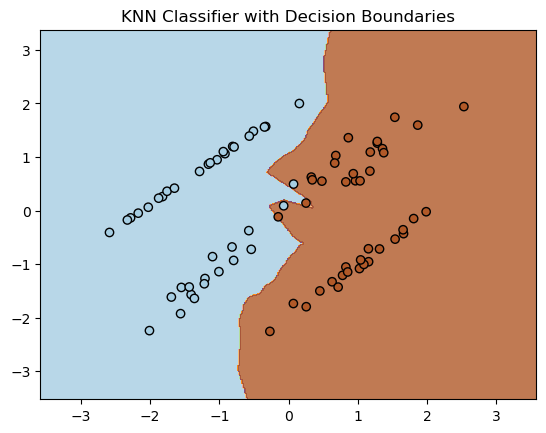

In [221]:
# Create a synthetic dataset for illustration
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier (you can adjust the 'n_neighbors' parameter)
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X_train, y_train)

# Plot the decision boundary and the data points
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain class predictions for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot the contour plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.title("KNN Classifier with Decision Boundaries")

plt.show()

In [210]:
def optimize_kmeans(X, max_clusters):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()  

c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Window

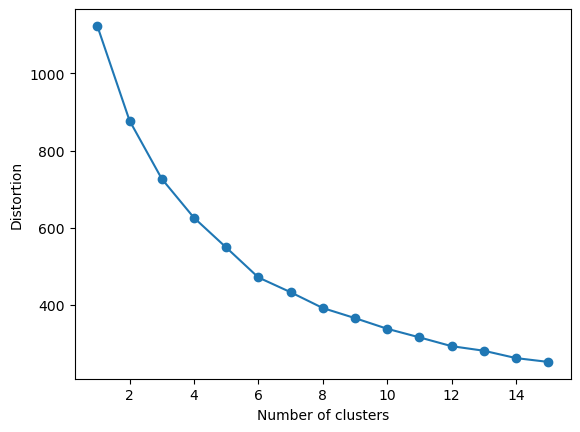

In [225]:
optimize_kmeans(scaled_dps, 15)

In [215]:
#KMeans

kmeans = KMeans(n_clusters=8)
kmeans.fit(train_x, train_y)

# training predictions
train_labels= kmeans.predict(train_x)

#testing predictions
test_labels = kmeans.predict(test_x)

c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [216]:
#KMeans model accuracy

 

#training accuracy
print(accuracy_score(train_y, train_labels)*100)
#testing accuracy
print(accuracy_score(test_labels, test_y)*100)

9.803921568627452
11.76470588235294


In [223]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [224]:
plot_clusters(X, train_y, plt_cluster_centers= True)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 102